In [2]:
import pandas as pd
df = pd.read_csv('/content/Corona_NLP_train.csv', encoding= 'ISO-8859-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
from typing_extensions import Text
Text =list (df['OriginalTweet'])
Text

['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
 "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
 "Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thin

In [4]:
len(Text)

41157

In [5]:
!pip install top2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.1 MB/s eta 0:00:00


In [6]:
!pip install top2vec[sentence_encoders]

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uni

In [7]:
!pip install sentence_transformers

In [8]:
from top2vec import Top2Vec


In [9]:
model = Top2Vec(documents=Text, speed="fast-learn", workers=8)

2024-11-06 05:32:52,614 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-11-06 05:32:58,113 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-11-06 05:33:04,899 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-11-06 05:37:11,254 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-11-06 05:38:25,858 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-11-06 05:38:33,162 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [10]:
model.get_num_topics()


5

In [11]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [12]:

topic_sizes, topic_nums

(array([39388,   700,   501,   404,   164]), array([0, 1, 2, 3, 4]))

In [14]:
topic_words, word_scores, topic_nums = model.get_topics(5)


In [15]:
topic_words, word_scores, topic_nums

(array([['coronavirusuk', 'kroger', 'coronavirus', 'panicshopping',
         'supermarkets', 'epidemic', 'groceries', 'supermarket',
         'coronavirususa', 'groceryshopping', 'panicbuying', 'grocers',
         'grocery', 'panicbuyinguk', 'outbreak', 'flu', 'gouging',
         'shopping', 'pharmacies', 'ill', 'sanitisers', 'crisis',
         'prevention', 'insurance', 'panic', 'stores', 'cov', 'disease',
         'emergency', 'germs', 'frozen', 'store', 'survival', 'pharmacy',
         'survive', 'stoppanicbuying', 'shoppers', 'worried', 'morrisons',
         'capitalism', 'markets', 'sanitiser', 'chinesevirus',
         'quarantinelife', 'costco', 'market', 'cure', 'goods',
         'sanitation', 'chains'],
        ['clients', 'customers', 'consumers', 'customer', 'consumer',
         'stayathome', 'task', 'businesses', 'working', 'us', 'business',
         'consumption', 'behaviors', 'shoppers', 'our', 'affect', 'homes',
         'problems', 'problem', 'ecommerce', 'operations', '

In [16]:

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)


In [17]:
topic_words, word_scores, topic_scores, topic_nums

([array(['coronavirusuk', 'kroger', 'coronavirus', 'panicshopping',
         'supermarkets', 'epidemic', 'groceries', 'supermarket',
         'coronavirususa', 'groceryshopping', 'panicbuying', 'grocers',
         'grocery', 'panicbuyinguk', 'outbreak', 'flu', 'gouging',
         'shopping', 'pharmacies', 'ill', 'sanitisers', 'crisis',
         'prevention', 'insurance', 'panic', 'stores', 'cov', 'disease',
         'emergency', 'germs', 'frozen', 'store', 'survival', 'pharmacy',
         'survive', 'stoppanicbuying', 'shoppers', 'worried', 'morrisons',
         'capitalism', 'markets', 'sanitiser', 'chinesevirus',
         'quarantinelife', 'costco', 'market', 'cure', 'goods',
         'sanitation', 'chains'], dtype='<U15'),
  array(['wtf', 'lol', 'hea', 'whata', 'hi', 'wow', 'whose', 'loo', 'pls',
         'what', 'co', 'fuck', 'cnn', 'hello', 'who', 'question', 'youa',
         'cough', 'thata', 'damn', 'ca', 'nhs', 'fda', 'cov', 'guess', 'ok',
         'wea', 'ya', 'cool', 'whateve

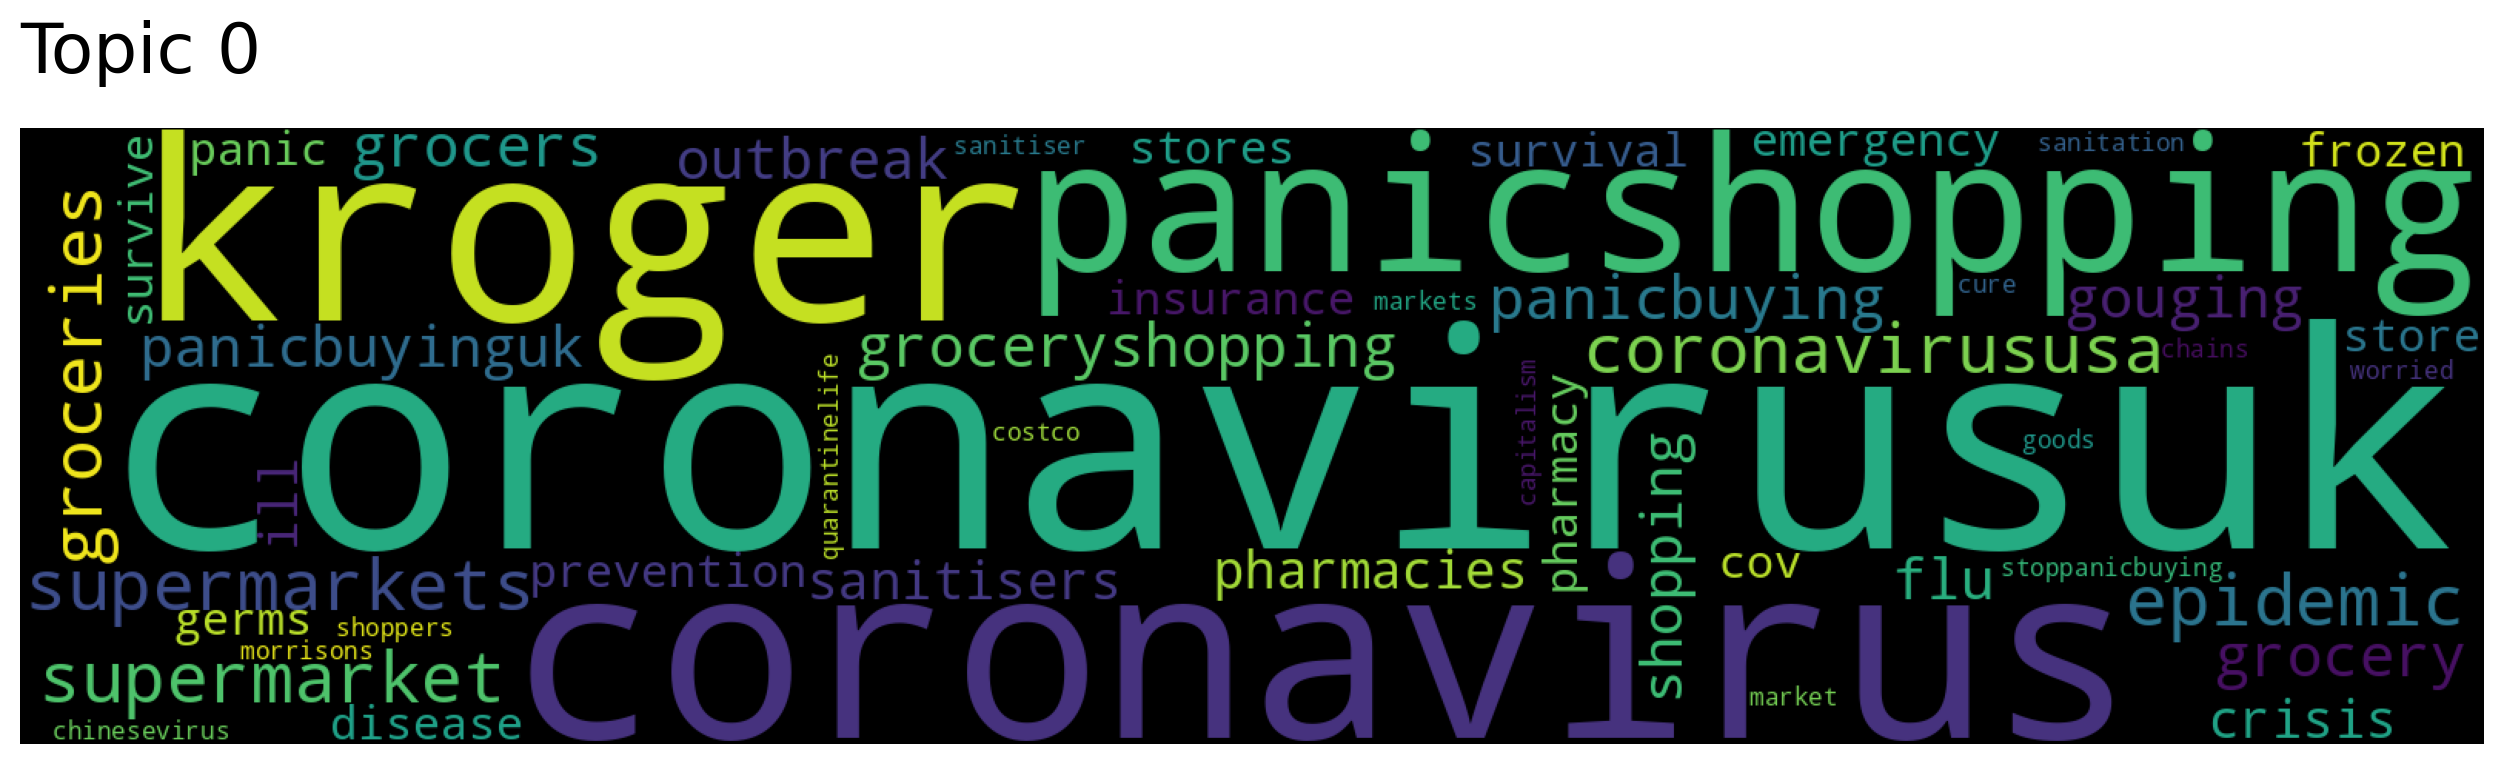

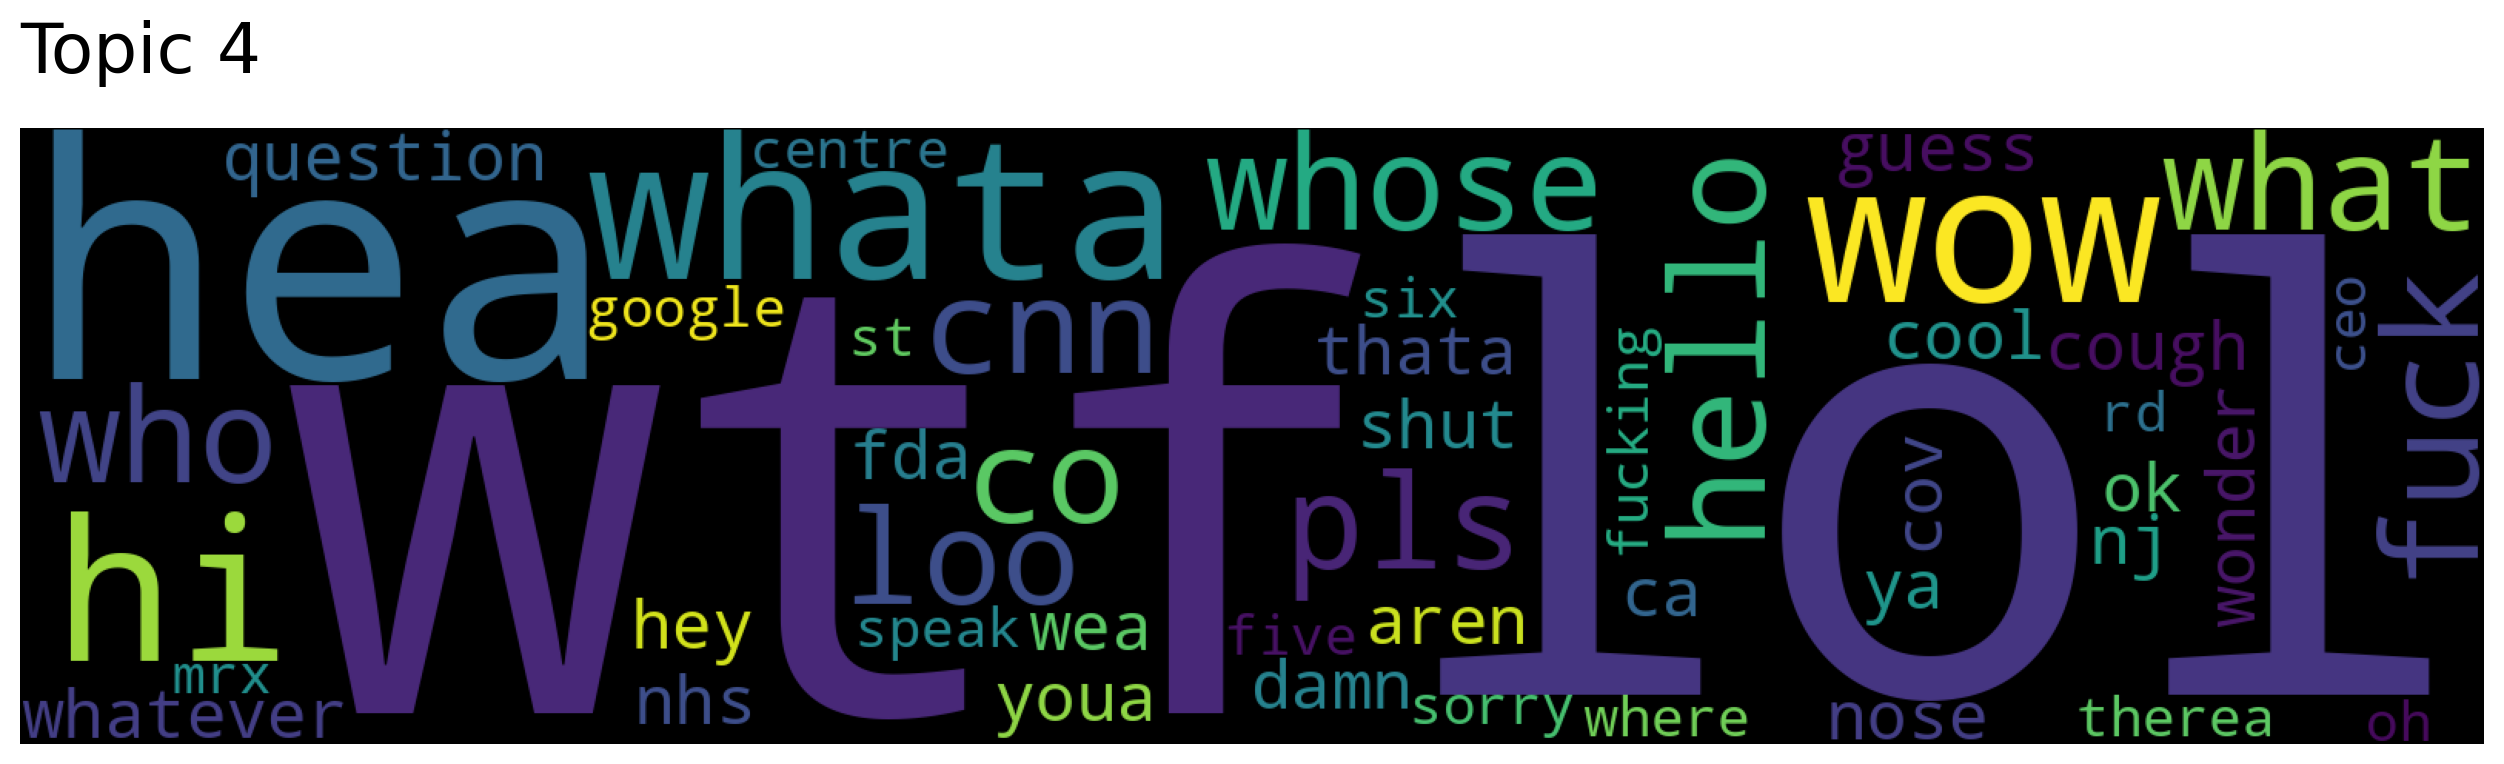

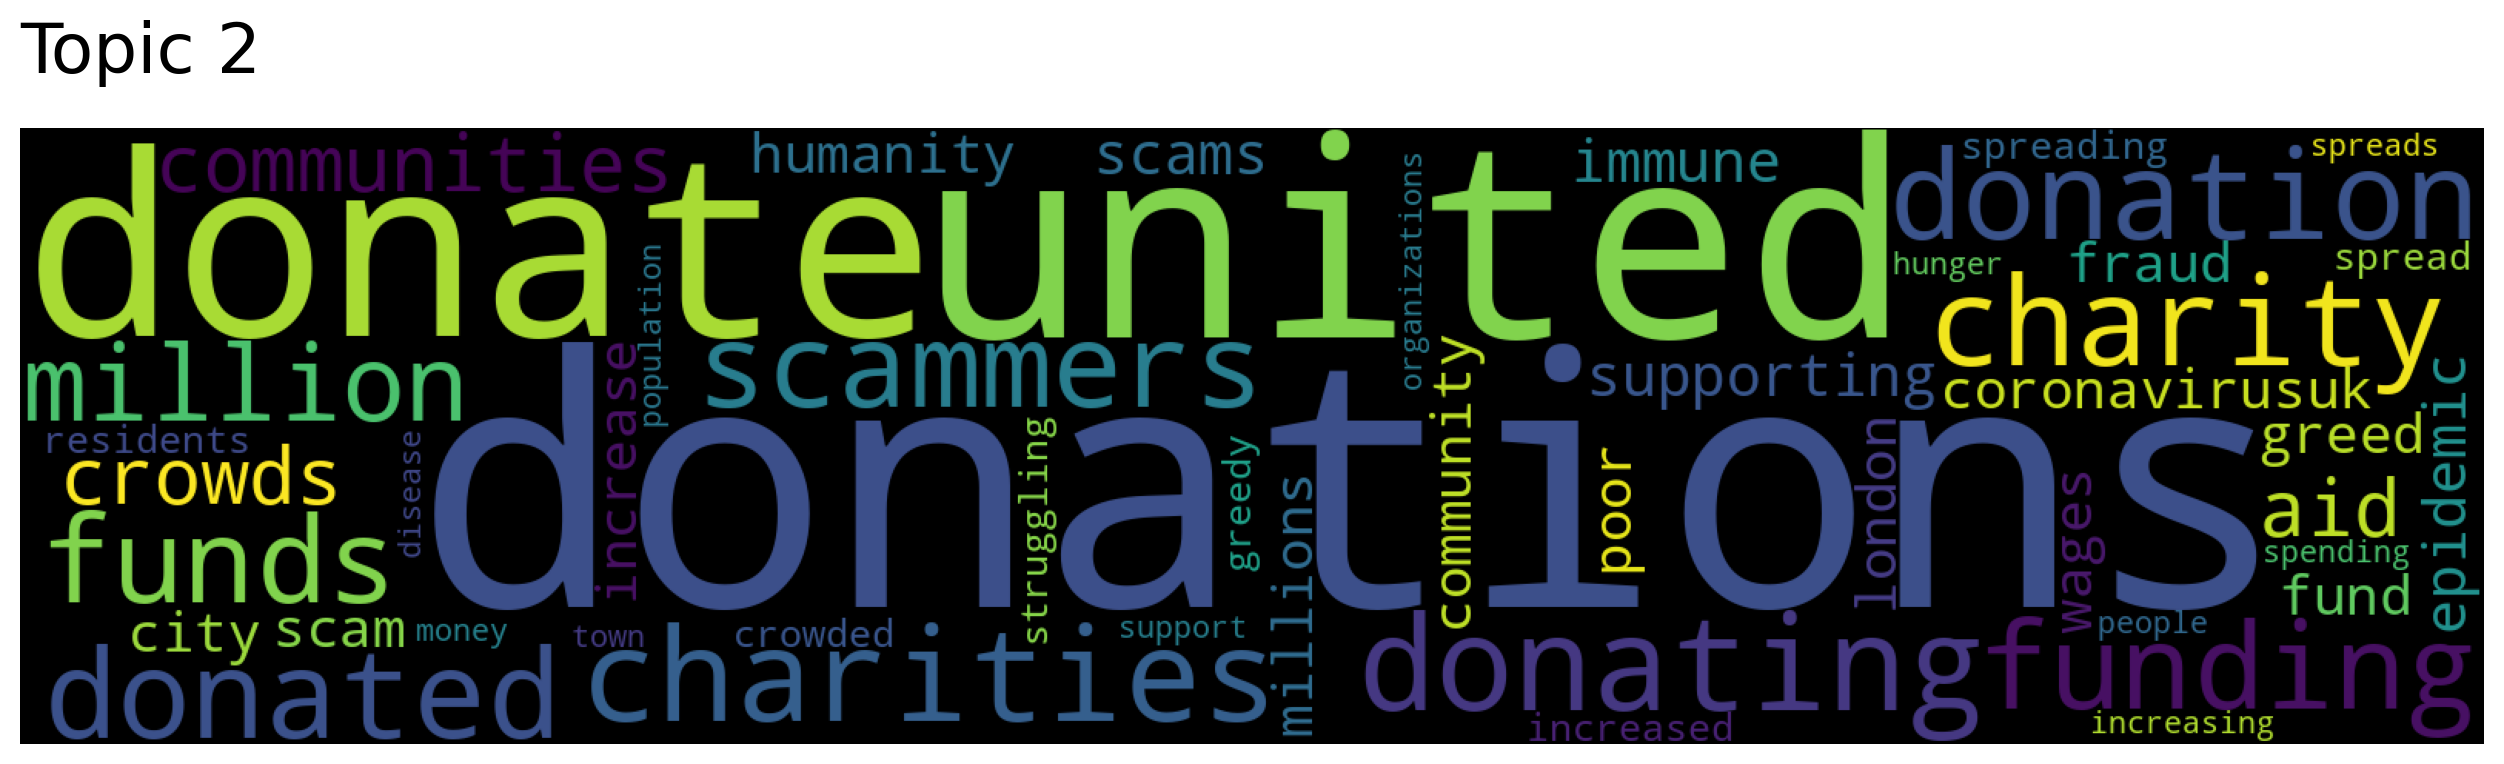

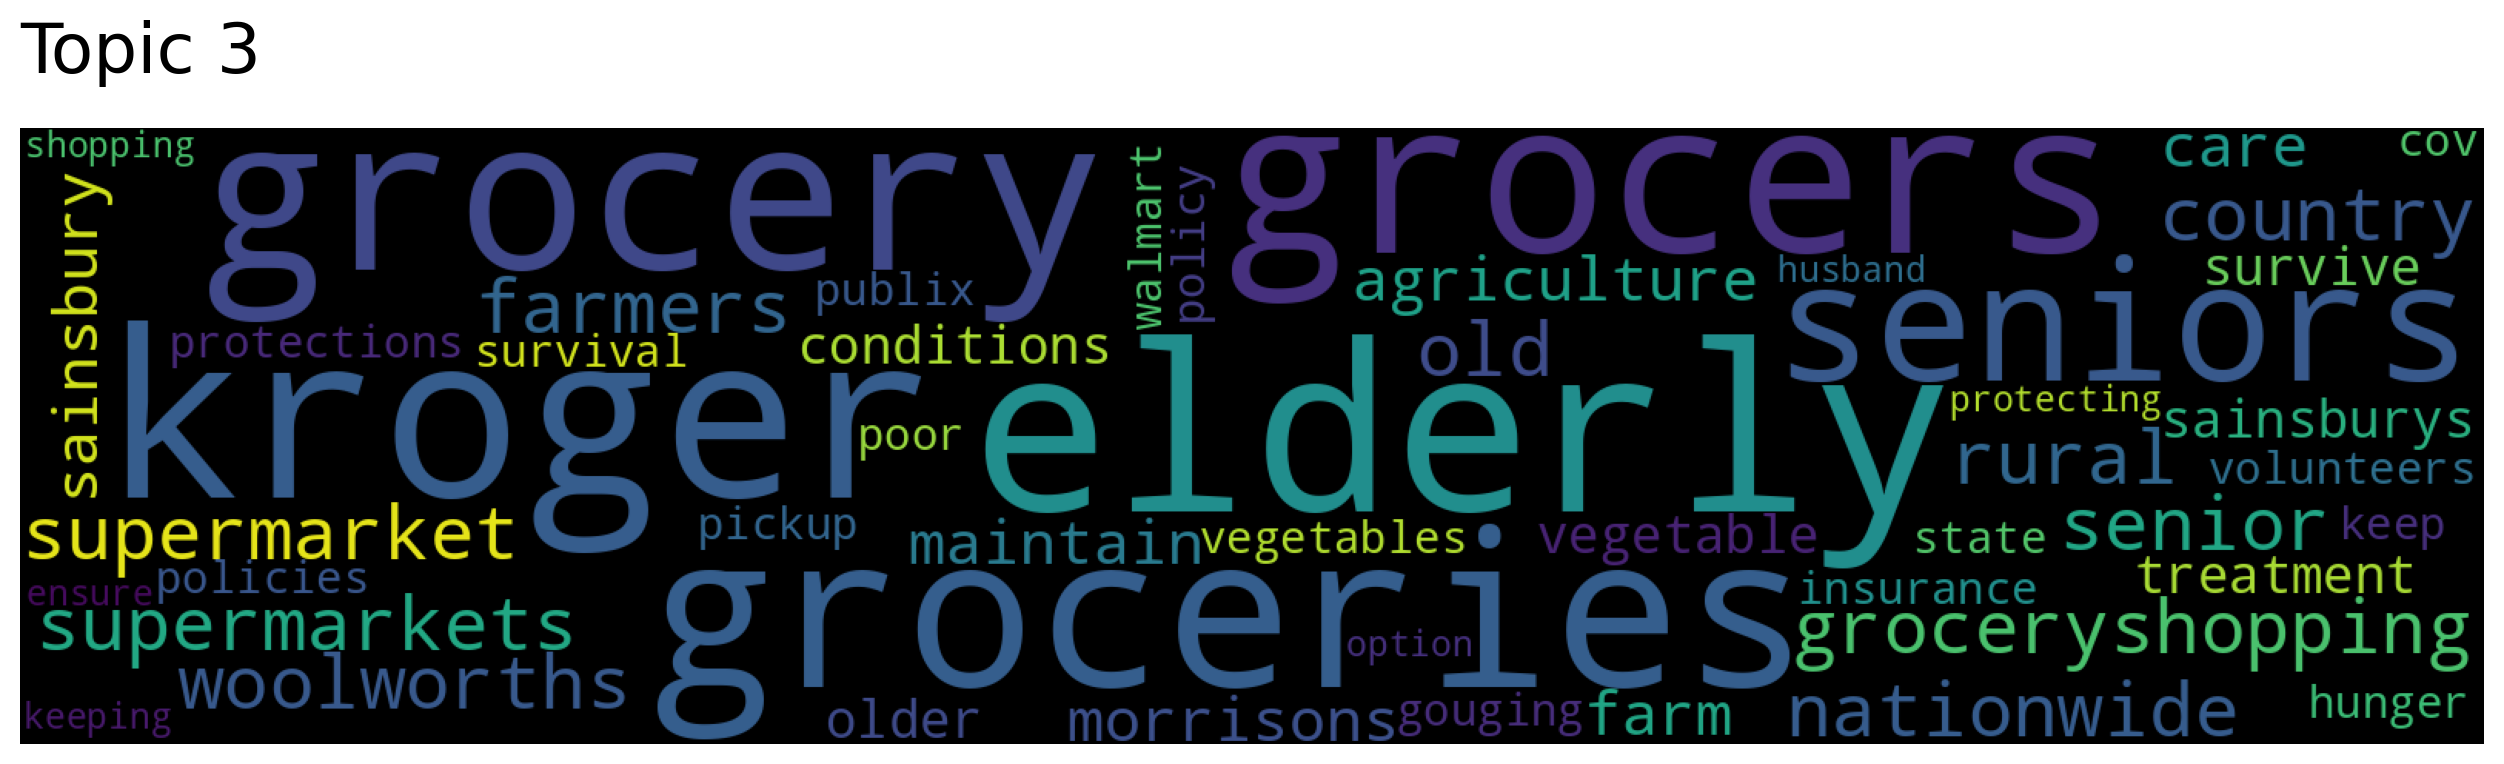

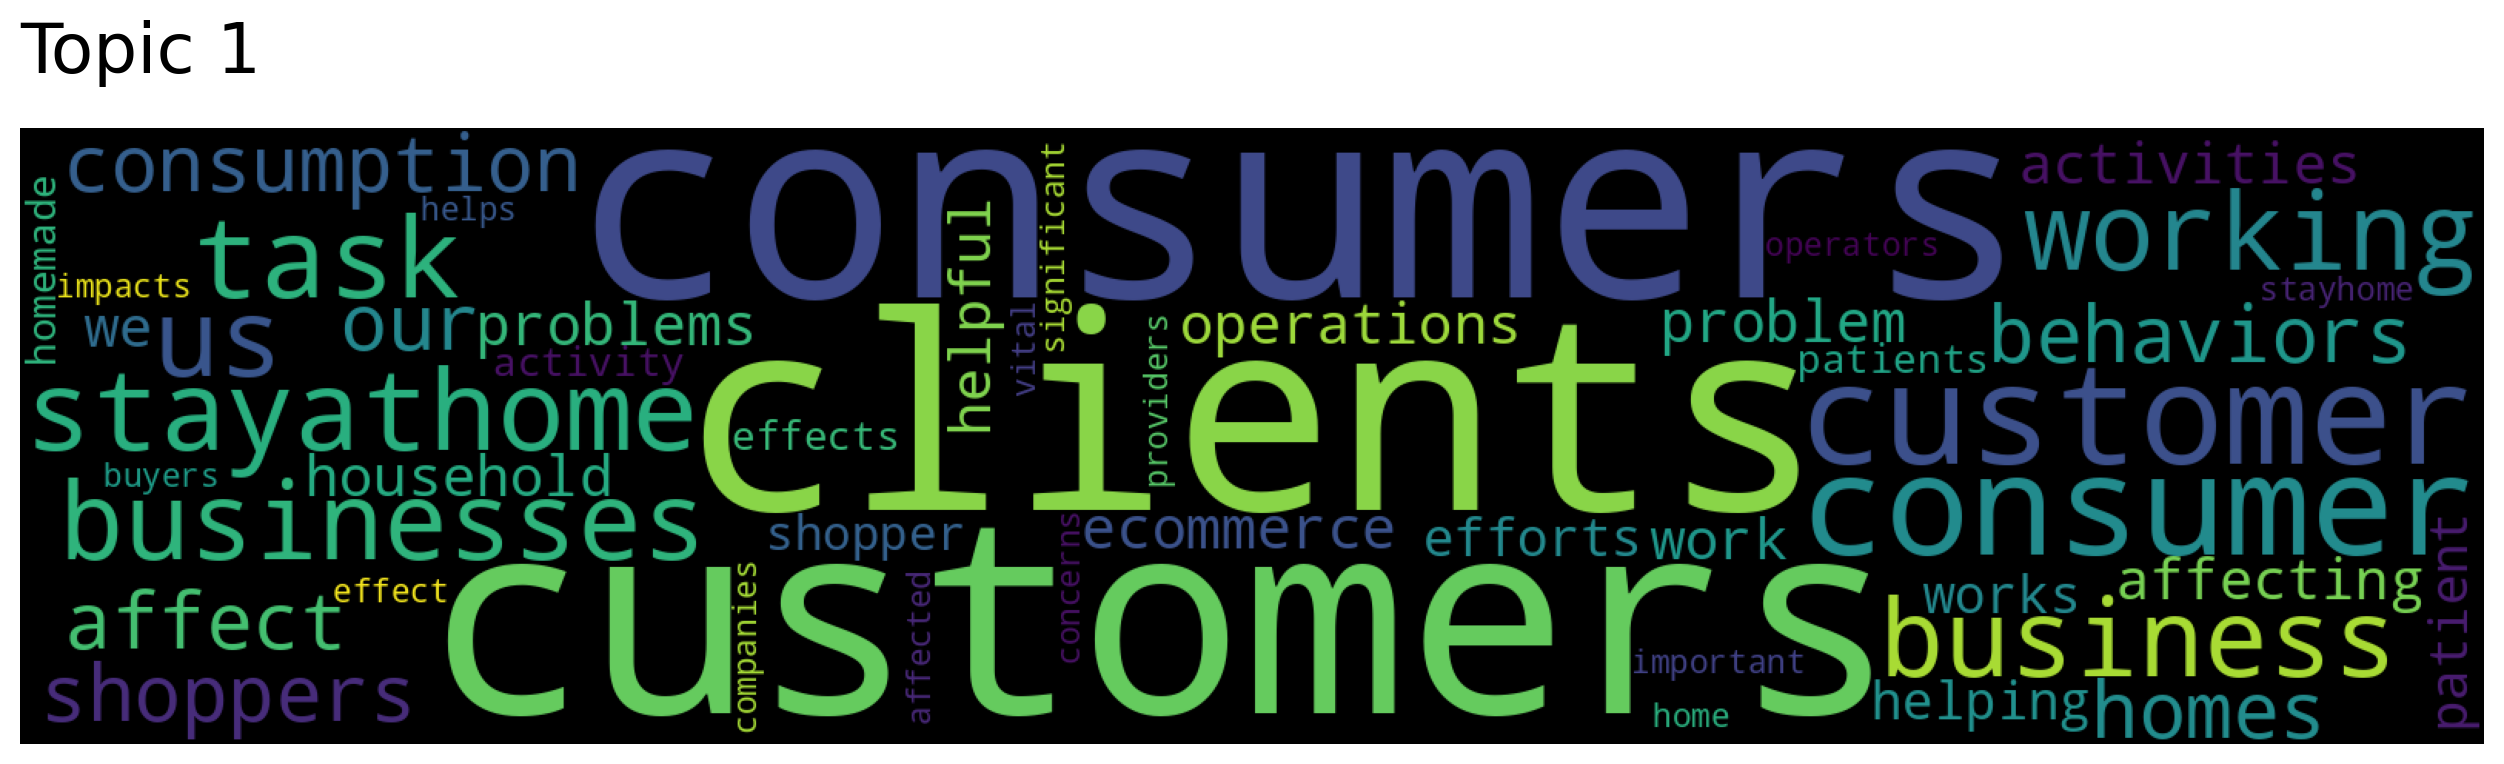

In [18]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [20]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=5)